# Movielens


## Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

## Analysis Tasks to be performed:

Import the three datasets

Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

User Age Distribution

User rating of the movie “Toy Story”

Top 25 movies by viewership rating

Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Feature Engineering:

### Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings

### Ratings.dat

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp

Field	Description
UserID	Unique identification for each user
MovieID	Unique identification for each movie
Rating	User rating for each movie
Timestamp	Timestamp generated while adding user review
UserIDs range between 1 and 6040 
The MovieIDs range between 1 and 3952
Ratings are made on a 5-star scale (whole-star ratings only)
A timestamp is represented in seconds since the epoch is returned by time(2)
Each user has at least 20 ratings


### Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code

Field	Description
UserID	Unique identification for each user
Genere	Category of each movie
Age	User’s age
Occupation	User’s Occupation
Zip-code	Zip Code for the user’s location
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

Gender is denoted by an "M" for male and "F" for female
Age is chosen from the following ranges:


 Value	Description
1	"Under 18"
18	"18-24"
25	"25-34"
35	"35-44"
45	"45-49"
50	"50-55"
56	"56+"

Value
 	Description
0	"other" or not specified
1	"academic/educator"
2	"artist”
3	"clerical/admin"
4	"college/grad student"
5	"customer service"
6	"doctor/health care"
7	"executive/managerial"
8	"farmer"
9	"homemaker"
10	"K-12 student"
11	"lawyer"
12	"programmer"
13	"retired"
14	 "sales/marketing"
15	"scientist"
16	 "self-employed"
17	"technician/engineer"
18	"tradesman/craftsman"
19	"unemployed"
20	"writer”


### Movies.dat
Format - MovieID::Title::Genres

Field	Description
MovieID	Unique identification for each movie
Title	A title for each movie
Genres	Category of each movie
 

 Titles are identical to titles provided by the IMDB (including year of release)
 

Genres are pipe-separated and are selected from the following genres:
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
ratings_col=['UserID','MovieID','Rating','Timestamp']
ratings = pd.read_csv('ratings.dat',sep='::',header=None,names=ratings_col,engine='python')
ratings.head(3)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [3]:
user_col = ['UserID','Gender','Age','Occupation','Zipcode']
users = pd.read_csv('users.dat',sep='::',header=None,names = user_col,engine='python')
users.head(3)

,UserID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


# Mapping Age and occupation codes 

In [4]:
#Value Description 1 "Under 18" 18 "18-24" 25 "25-34" 35 "35-44" 45 "45-49" 50 "50-55" 56 "56+"
def Age_distribution(age):
    if age == 1 :
        return "Under 18"
    elif age == 18:
        return "18-24"
    elif age == 25:
        return "25-34"
    elif age == 35:
        return "35-44"
    elif age == 45:
        return "45-49"
    elif age == 50: 
        return "50-55"
    else:
        return "> 56+"

In [5]:
users['Age_dist'] = users['Age'].apply(Age_distribution)

In [6]:
users.head()

,UserID,Gender,Age,Occupation,Zipcode,Age_dist
0,1,F,1,10,48067,Under 18
1,2,M,56,16,70072,> 56+
2,3,M,25,15,55117,25-34
3,4,M,45,7,02460,45-49
4,5,M,25,20,55455,25-34


In [7]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
users['age_group'] = pd.cut(users.Age, range(0, 81, 10), right=False, labels=labels)
#users[['age', 'age_group']].drop_duplicates()[:10]

In [8]:
users.head()

,UserID,Gender,Age,Occupation,Zipcode,Age_dist,age_group
0,1,F,1,10,48067,Under 18,0-9
1,2,M,56,16,70072,> 56+,50-59
2,3,M,25,15,55117,25-34,20-29
3,4,M,45,7,02460,45-49,40-49
4,5,M,25,20,55455,25-34,20-29


In [9]:
# Value Description 
occup_dic = {0: "other", 
             1 : "academic", 
             2: "artists",
             3: "Clerical/admin",
             4: "college/grad student",
             5: "customer service",
             6: "doctor/health care",
             7: "executive/managerial",
             8: "farmer",
             9: "homemaker",
             10: "K-12 student",
             11 : "lawyer",
             12 : "programer",
             13 : "retired",
             14  : "sales/marketing",
             15 : "scientist",
             16 : "self-employed",
             17 : "technician/engineer",
             18 : "tradesman/craftsman",
             19 : "unemployed",
             20 : "writer"
            } 



In [10]:
users['Occup_desc'] = users['Occupation'].apply(lambda x: occup_dic.get(x))

In [11]:
users.head()

,UserID,Gender,Age,Occupation,Zipcode,Age_dist,age_group,Occup_desc
0,1,F,1,10,48067,Under 18,0-9,K-12 student
1,2,M,56,16,70072,> 56+,50-59,self-employed
2,3,M,25,15,55117,25-34,20-29,scientist
3,4,M,45,7,02460,45-49,40-49,executive/managerial
4,5,M,25,20,55455,25-34,20-29,writer


# Reading movies.dat

In [12]:
movie_col= ['MovieID','Title','Genres']
movies = pd.read_csv('movies.dat',sep='::',header = None, names = movie_col,engine = 'python',index_col ='MovieID')
movies.head(3)

,Title,Genres
MovieID,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


In [13]:

#pd.get_dummies(movies['Genres'])
movies_genre = movies['Genres'].str.get_dummies(sep='|')
movies = movies.merge(movies_genre,how='left',left_on='MovieID',right_on = 'MovieID')

In [14]:
movies.head(3)

,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## Merging all the 3 data sets 

In [15]:
user_ratings = ratings.merge(users,how='left',on='UserID')

In [16]:
master_data = user_ratings.merge(movies,how='left',on='MovieID')

In [17]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 31 columns):
UserID         1000209 non-null int64
MovieID        1000209 non-null int64
Rating         1000209 non-null int64
Timestamp      1000209 non-null int64
Gender         1000209 non-null object
Age            1000209 non-null int64
Occupation     1000209 non-null int64
Zipcode        1000209 non-null object
Age_dist       1000209 non-null object
age_group      1000209 non-null category
Occup_desc     1000209 non-null object
Title          1000209 non-null object
Genres         1000209 non-null object
Action         1000209 non-null int64
Adventure      1000209 non-null int64
Animation      1000209 non-null int64
Children's     1000209 non-null int64
Comedy         1000209 non-null int64
Crime          1000209 non-null int64
Documentary    1000209 non-null int64
Drama          1000209 non-null int64
Fantasy        1000209 non-null int64
Film-Noir      1000209 non-null int64
Horr

# Age Distribution:

## - Users in the age group of 25-34 were the highest while those in the age group under 18 and above 56 are the lowest
    
    

In [18]:
labels = ['1-18','19-25','26-35','36-45','46-50','51+']
age = pd.DataFrame(pd.cut(users.Age,[0,18,25,35,45,50,100],labels= labels).value_counts().sort_index())

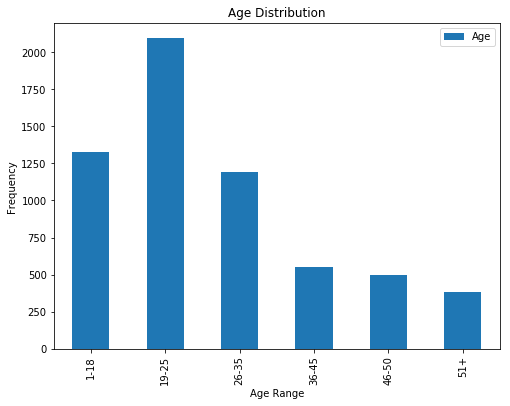

In [19]:
age.plot(kind='bar',figsize = (8,6))
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# lets find which group had highest ratings

In [31]:
cols = ['Age','Rating']
age_ratings = master_data[cols]
age_ratings['Rating'].value_counts()
plt.figure(figsize=(8,6))
sn.barplot(age_ratings.index,age_ratings.values)
plt.title('Age vs Ratings, fontsize=14')
plt.xlabel('Age',fontsize=12)
plt.ylabel('Ratings',fontsize=12)

Exception: Data must be 1-dimensional

<Figure size 576x432 with 0 Axes>

# Toy Story Rating Analysis:

In [23]:
mask = master_data['Title']=='Toy Story (1995)'

# The ratings for the movie 'Toy Story' has a averge of 4 to 5 stars 

In [24]:
mask = master_data['Title']=='Toy Story (1995)'
toystory = master_data.loc[mask,'Rating'].value_counts()

In [25]:
toystory

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Toy Story User Ratings')

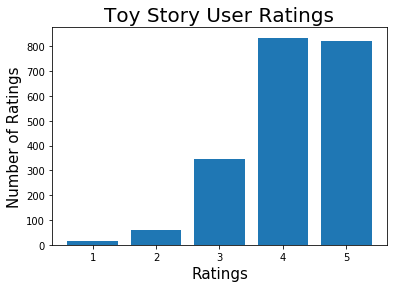

In [17]:
plt.bar(toystory.index,toystory)
plt.xlabel('Ratings',fontsize=15)
plt.ylabel('Number of Ratings',fontsize =15)
plt.title('Toy Story User Ratings', fontsize = 20)

# Top 25 movies by viewership rating

In [22]:
title = master_data.groupby('Title')

In [30]:
title['Rating'].sum().sort_values(ascending=False).head(25)

Title
American Beauty (1999)                                   14800
Star Wars: Episode IV - A New Hope (1977)                13321
Star Wars: Episode V - The Empire Strikes Back (1980)    12836
Star Wars: Episode VI - Return of the Jedi (1983)        11598
Saving Private Ryan (1998)                               11507
Raiders of the Lost Ark (1981)                           11257
Silence of the Lambs, The (1991)                         11219
Matrix, The (1999)                                       11178
Sixth Sense, The (1999)                                  10835
Terminator 2: Judgment Day (1991)                        10751
Fargo (1996)                                             10692
Schindler's List (1993)                                  10392
Braveheart (1995)                                        10346
Back to the Future (1985)                                10307
Shawshank Redemption, The (1994)                         10143
Godfather, The (1972)                            

# Unique Genres

In [89]:
genre = master_data['Genres'].str.split('|')

In [90]:
genre= list(genre)

In [114]:
uniquegenre=[]
for items in genre:
    for sub in items:
        if sub not in uniquegenre:
            uniquegenre.append(sub)
            

In [115]:
uniquegenre

['Drama',
 'Animation',
 "Children's",
 'Musical',
 'Romance',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'War',
 'Thriller',
 'Crime',
 'Mystery',
 'Western',
 'Horror',
 'Film-Noir',
 'Documentary']

In [130]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [138]:
movies['GenValue'] = 0

In [144]:
movies.set_index =['MovieID']

In [145]:
movies.head()

,MovieID,Title,Genres,GenValue
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0
4,5,Father of the Bride Part II (1995),Comedy,0


In [165]:
for items in movies:
    gen= items['Genres']
    

TypeError: string indices must be integers